## KSA Flora Case Study : 
####  There are around 2288 species in 855 genera in Saudi Arabia's flora, including 9 Gymnosperms and 29 Pteridophytes among them. Saudi Arabia has roughly 1620 (71.02 percent) trees, 565 (24.73 percent) bushes, and 97 (4.25 percent) herbs, according to current estimates.
#### In this notebook I'll be exploring KSA flora images dataset to understand more about the flora and I'm aiming to build AI classification system using this data. 

### 1. Import :

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.algorithms import unique
from tensorflow.keras.preprocessing import image
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Reading the data :

In [2]:
data = pd.read_csv("data/data.csv")
data.head()

,label,img
0,ACANTHACEAE,C:\Users\un_cs\Documents\capStoneProject\data\...
1,ACANTHACEAE,C:\Users\un_cs\Documents\capStoneProject\data\...
2,ACANTHACEAE,C:\Users\un_cs\Documents\capStoneProject\data\...
3,ACANTHACEAE,C:\Users\un_cs\Documents\capStoneProject\data\...
4,ACANTHACEAE,C:\Users\un_cs\Documents\capStoneProject\data\...


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7021 non-null   object
 1   img     7021 non-null   object
dtypes: object(2)
memory usage: 109.8+ KB


### Please note that the collocted data numbers is : 4343,
 #### This number is after data agumatution. 

In [5]:
data.shape 

(7021, 2)

#### How many famlies is included ?

In [6]:
unique_families = data["label"].unique()
len(unique_families)

21

#### Exploring the images : 

In [7]:
eda_df = data.groupby('label').apply(lambda x:x.sample(1))
eda_df.head()

,,label,img
label,,,
ACANTHACEAE,73,ACANTHACEAE,C:\Users\un_cs\Documents\capStoneProject\image...
AIZOACEAE,344,AIZOACEAE,C:\Users\un_cs\Documents\capStoneProject\image...
ALLIACEAE,416,ALLIACEAE,C:\Users\un_cs\Documents\capStoneProject\image...
ALOACEAE,529,ALOACEAE,C:\Users\un_cs\Documents\capStoneProject\image...
AMARANTHACEAE,804,AMARANTHACEAE,C:\Users\un_cs\Documents\capStoneProject\image...


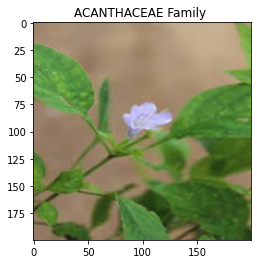

In [10]:
size = (200, 200)
image_path = r'.\data\data\images\ACANTHACEAE\0b7fcd4c18.jpg'
im = Image.open(image_path)
im = im.resize(size)
plt.imshow(im)
# الفصيلة الأقنثية
plt.title("ACANTHACEAE Family ")
plt.show()

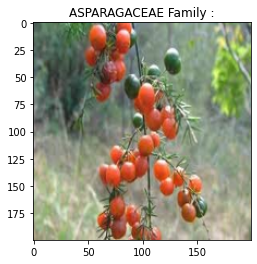

In [13]:
image_path = r'.\data\data\images\ASPARAGACEAE\asparagus_africanus_plant\8f917f0786.jpg'
im = Image.open(image_path)
im = im.resize(size)
plt.imshow(im)
# الفصيلة الزنبقية
plt.title("ASPARAGACEAE Family :")
plt.show()


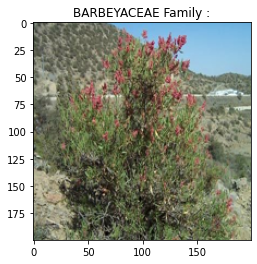

In [16]:
image_path = r".\data\data\images\BARBEYACEAE\barbeya_oleoides',_'_plant\39eeb49057.jpg"
im = Image.open(image_path)
im = im.resize(size)
plt.imshow(im)
# الفصيلة الباربية
plt.title("BARBEYACEAE Family :")
plt.show()


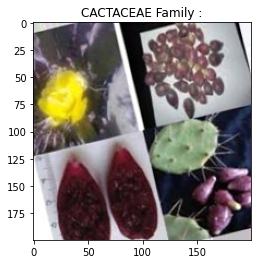

In [17]:
image_path = r".\data\data\images\CACTACEAE\dr_0_232.jpg"
im = Image.open(image_path)
im = im.resize(size)
plt.imshow(im)
# الفصيلة الشوكية
plt.title("CACTACEAE Family :")
plt.show()

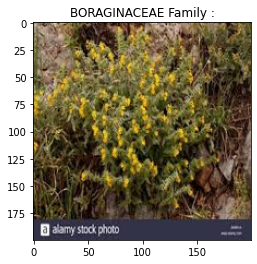

In [18]:
image_path = r".\data\data\images\BORAGINACEAE\alkanna_orientalis',_'_plant\9b60a64ca1.jpg"
im = Image.open(image_path)
im = im.resize(size)
plt.imshow(im)
# الفصيلة الحمحمية
plt.title("BORAGINACEAE Family :")
plt.show()

####  How many images for each family ?

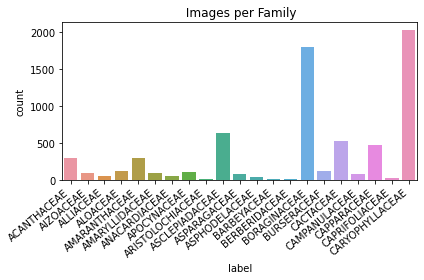

In [19]:
ax = sns.countplot(x="label", data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title(" Images per Family")
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='label'>

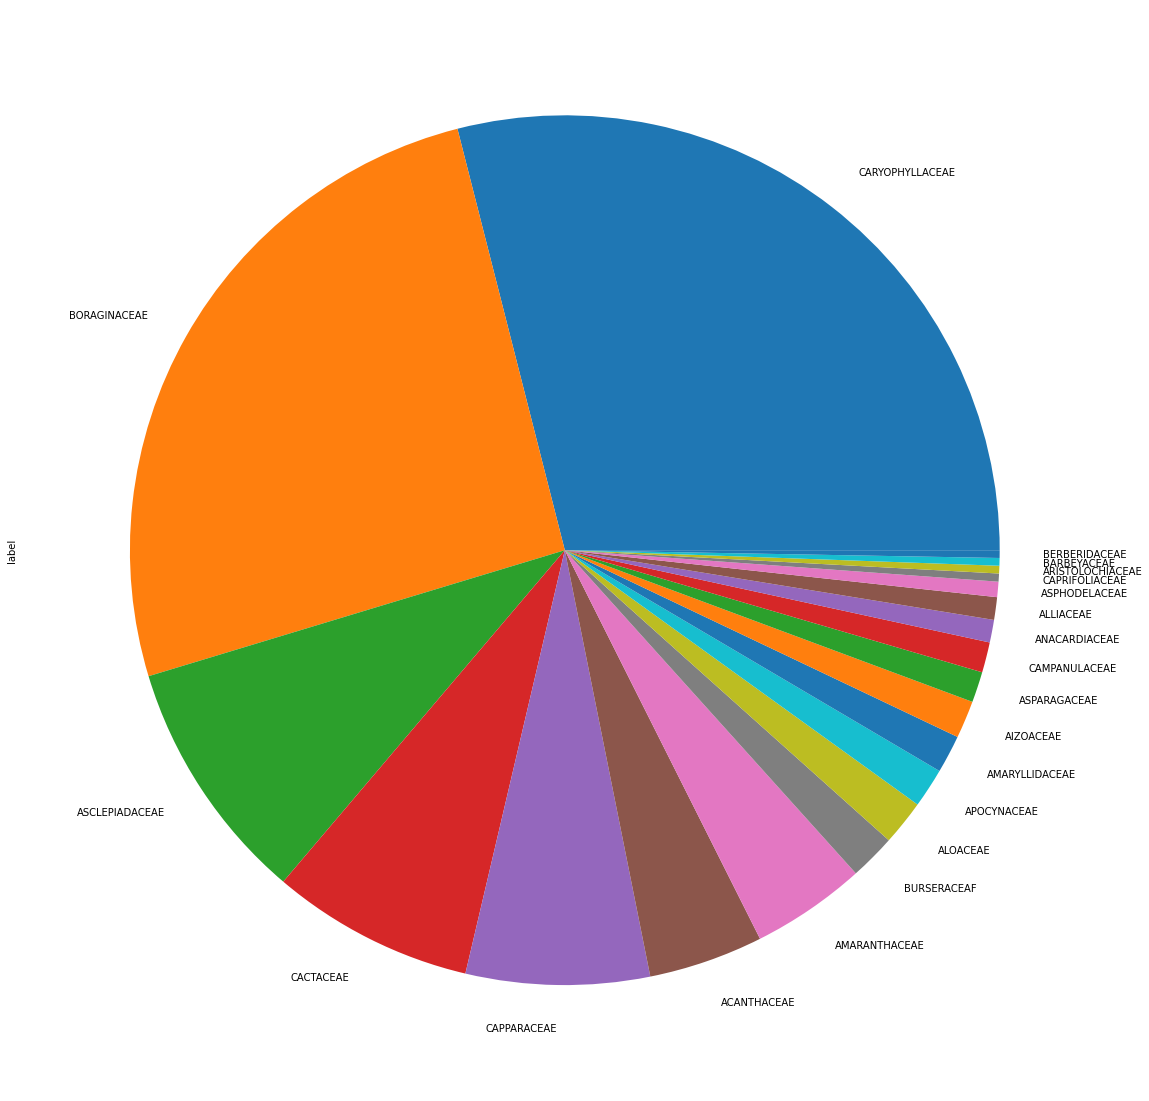

In [21]:
data["label"].value_counts().plot.pie(figsize=(20,20))

Images by label ratio : *after image agumatution the ratio changed*

In [20]:
data['label'].value_counts(normalize=True)*100
# The original answer :
'''
CARYOPHYLLACEAE     20.101312
BORAGINACEAE        17.844808
ASCLEPIADACEAE      14.736357
CAPPARACEAE         11.121345
ACANTHACEAE          6.884642
AMARANTHACEAE        6.884642
BURSERACEAF          2.763067
ALOACEAE             2.717016
APOCYNACEAE          2.371633
AMARYLLIDACEAE       2.279530
AIZOACEAE            2.256505
ASPARAGACEAE         1.842045
CAMPANULACEAE        1.819019
ANACARDIACEAE        1.358508
ALLIACEAE            1.358508
ASPHODELACEAE        0.921022
CACTACEAE            0.874971
CAPRIFOLIACEAE       0.483537
ARISTOLOCHIACEAE     0.460511
BARBEYACEAE          0.460511
BERBERIDACEAE        0.460511
''' 



CARYOPHYLLACEAE     28.970232
BORAGINACEAE        25.708589
ASCLEPIADACEAE       9.115511
CACTACEAE            7.534539
CAPPARACEAE          6.822390
ACANTHACEAE          4.258653
AMARANTHACEAE        4.258653
BURSERACEAF          1.709158
ALOACEAE             1.680672
APOCYNACEAE          1.467027
AMARYLLIDACEAE       1.410056
AIZOACEAE            1.395813
ASPARAGACEAE         1.139439
CAMPANULACEAE        1.125196
ANACARDIACEAE        0.840336
ALLIACEAE            0.840336
ASPHODELACEAE        0.569719
CAPRIFOLIACEAE       0.299103
ARISTOLOCHIACEAE     0.284860
BARBEYACEAE          0.284860
BERBERIDACEAE        0.284860
Name: label, dtype: float64

### Images EDA : 
Image data sets differ from other types in that *exploratory data analysis* is harder to apply to them. To have a better understanding of the data, I'll concentrate on **the photos and colors** to determine whether there's a link between the family and the colors that exist in each plant group.
- What is the average image for each family ?
- What are the dominant colors in each family ?

####  The average image for each family ?


c:\Users\un_cs\Documents\capStoneProject\.cp\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


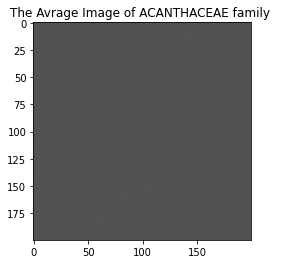

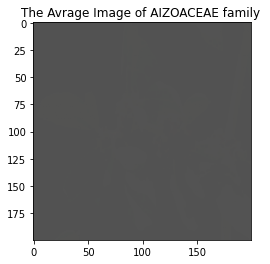

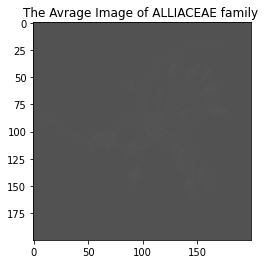

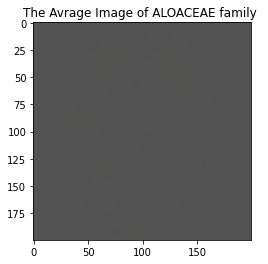

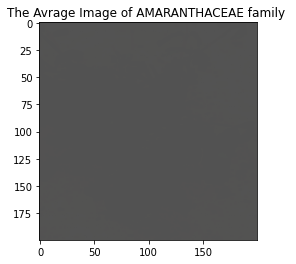

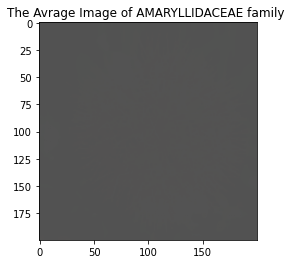

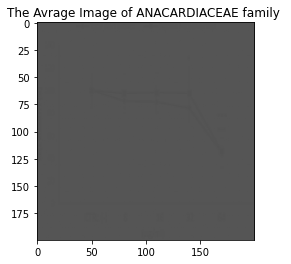

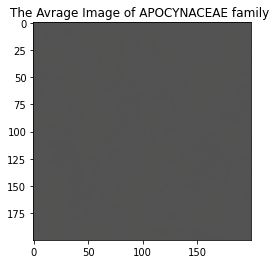

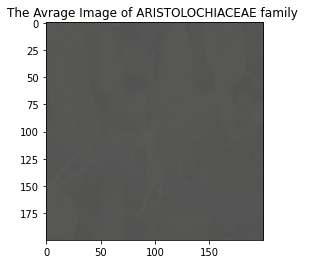

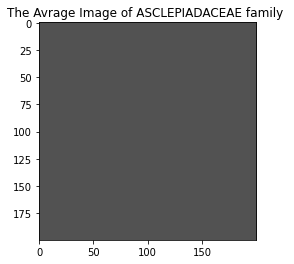

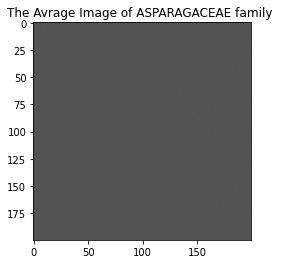

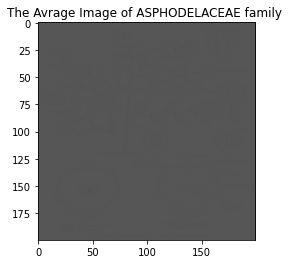

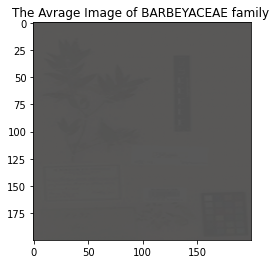

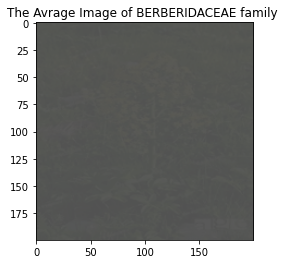

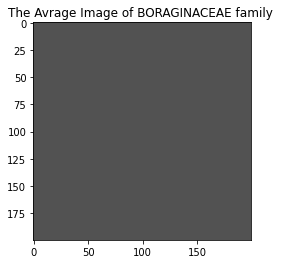

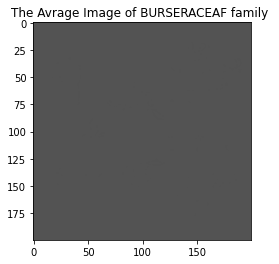

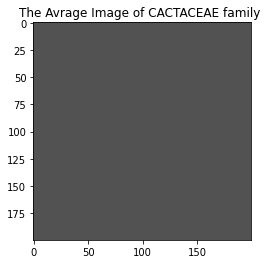

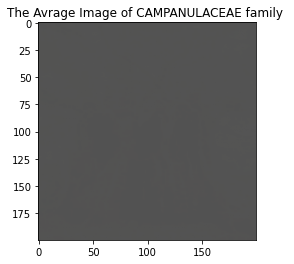

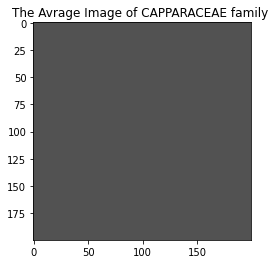

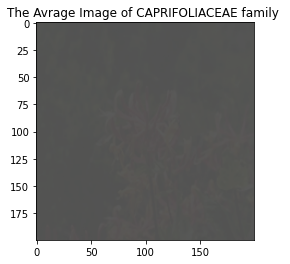

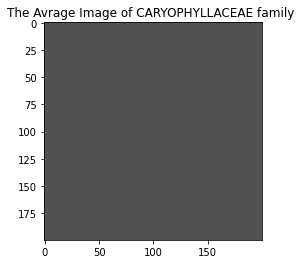

In [31]:
# find the avrage image and plot it : 
import os, numpy, PIL
from PIL import Image
labels = [
    "ACANTHACEAE", "AIZOACEAE", "ALLIACEAE", "ALOACEAE", "AMARANTHACEAE",
    "AMARYLLIDACEAE", "ANACARDIACEAE", "APOCYNACEAE", "ARISTOLOCHIACEAE",
    "ASCLEPIADACEAE", "ASPARAGACEAE", "ASPHODELACEAE", "BARBEYACEAE",
    "BERBERIDACEAE", "BORAGINACEAE", "BURSERACEAF", "CACTACEAE",
    "CAMPANULACEAE", "CAPPARACEAE", "CAPRIFOLIACEAE", "CARYOPHYLLACEAE"
]
# Access all images files in directory
siz=(200,200)
for l in labels :
    d = data.loc[data['label'] == l, 'img']
    N = len(d)
    for imgpath in d:
        img = Image.open(imgpath).resize(siz)
        w,h = img.size
        arr = numpy.zeros((h,w,3),float)
        imarray = numpy.array(Image.open(imgpath).resize(siz),dtype=numpy.float)
    arr = arr+imarray/N
    arr = numpy.array(numpy.round(arr),dtype=numpy.uint16)
    import matplotlib.image as mpimg
    output=Image.fromarray(arr,mode="RGB")
    output.save(r".\plots\Average_"+l+".jpg")
    plt.imshow(arr/255.0,alpha=0.68)
    plt.title(f"The Avrage Image of {l} family ")
    plt.show()
    






#### The dominant colors in each family : *only the top 5 colors*

The family is :  ACANTHACEAE  It had :  261  Colors


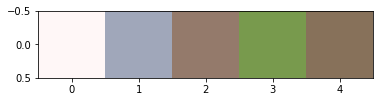

The family is :  AIZOACEAE  It had :  94  Colors


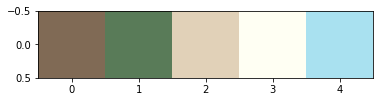

The family is :  ALLIACEAE  It had :  55  Colors


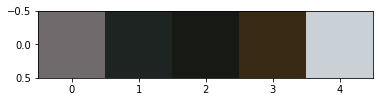

The family is :  ALOACEAE  It had :  107  Colors


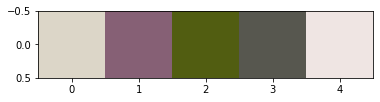

The family is :  AMARANTHACEAE  It had :  267  Colors


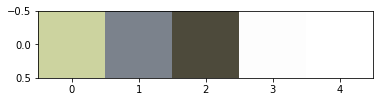

The family is :  AMARYLLIDACEAE  It had :  95  Colors


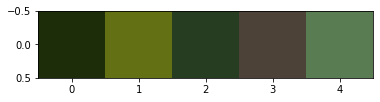

The family is :  ANACARDIACEAE  It had :  53  Colors


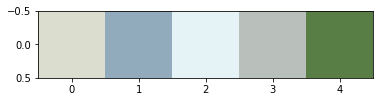

The family is :  APOCYNACEAE  It had :  90  Colors


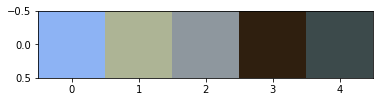

The family is :  ARISTOLOCHIACEAE  It had :  20  Colors


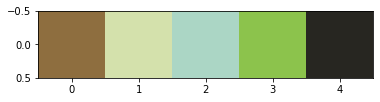

The family is :  ASCLEPIADACEAE  It had :  545  Colors


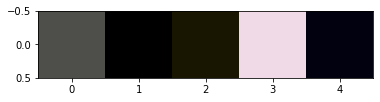

The family is :  ASPARAGACEAE  It had :  68  Colors


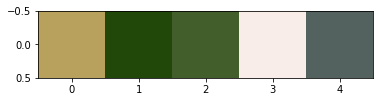

The family is :  ASPHODELACEAE  It had :  32  Colors


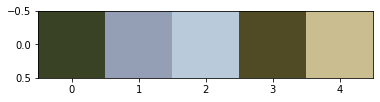

The family is :  BARBEYACEAE  It had :  19  Colors


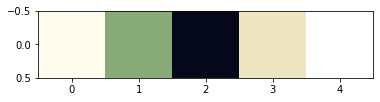

The family is :  BERBERIDACEAE  It had :  20  Colors


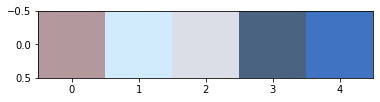

The family is :  BORAGINACEAE  It had :  1604  Colors


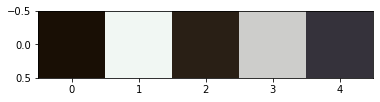

The family is :  BURSERACEAF  It had :  103  Colors


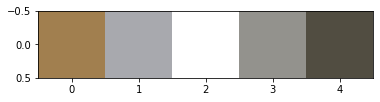

The family is :  CACTACEAE  It had :  399  Colors


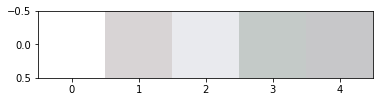

The family is :  CAMPANULACEAE  It had :  71  Colors


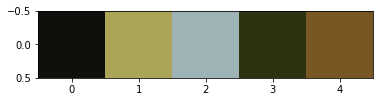

The family is :  CAPPARACEAE  It had :  397  Colors


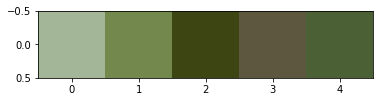

The family is :  CAPRIFOLIACEAE  It had :  21  Colors


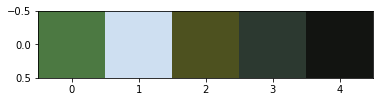

The family is :  CARYOPHYLLACEAE  It had :  1818  Colors


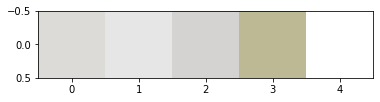

In [32]:
def get_dominant_color(imgpath):
    img = Image.open(imgpath)
    img = img.copy()
    img.convert("RGB")
    img.resize((1, 1), resample=0)
    dominant_color = img.getpixel((0, 0))
    return dominant_color
siz=(300,300)
for l in labels :
    d = data.loc[data['label'] == l, 'img']
    N = len(d)
    dominant_colors =[]
    for imgpath in d:
        
        color = get_dominant_color(imgpath)
        if color not in dominant_colors:
            dominant_colors.append(color)
    plt.imshow([dominant_colors[0:5]])
    print("The family is : ",l, " It had : ",len(dominant_colors)," Colors")
    plt.show()

### 5. Data Balance check :

In [3]:
names = ['CARYOPHYLLACEAE','BORAGINACEAE']
new = data.loc[data['label'].isin(names)]


In [7]:
new["label"].value_counts()

CARYOPHYLLACEAE    2034
BORAGINACEAE       1805
Name: label, dtype: int64

In [9]:
new["label"].value_counts(normalize=True)*100

CARYOPHYLLACEAE    52.982548
BORAGINACEAE       47.017452
Name: label, dtype: float64

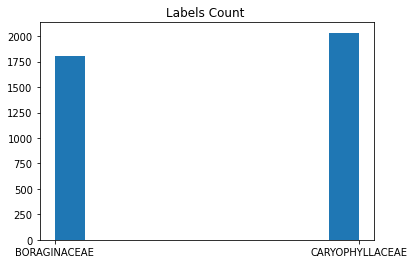

In [10]:
plt.hist(new["label"])
plt.title("Labels Count ")
plt.show()

####  Extre : In this stage info about images size may help :

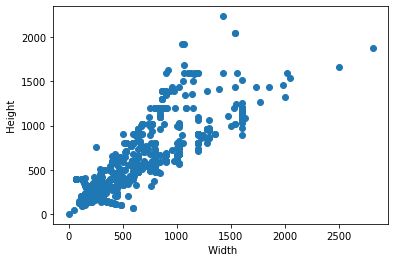

In [42]:
p = data['img']
sizes = []
for path_to in p :
    img = Image.open(path_to)
    s = img.size
    sizes.append(s)
plt.xlabel(" Width")
plt.ylabel(" Height ")
plt.scatter(*zip(*sizes))

##### The max and min image size :

In [44]:
max(sizes)

(2816, 1880)

In [45]:
min(sizes)

(1, 1)